In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import contractions
import nltk

In [ ]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')#('New_Delhi_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


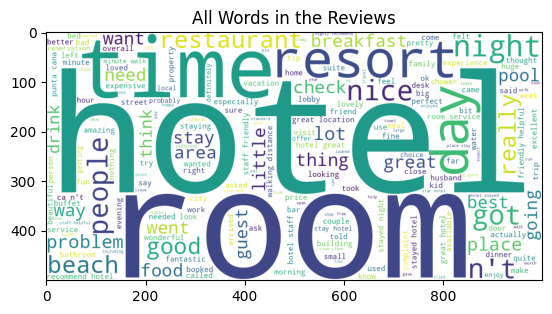

In [ ]:
all_words = ' '.join(data['Review'])

# Создание облака слов
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.title('All Words in the Reviews')
plt.show()

<Axes: ylabel='Rating'>

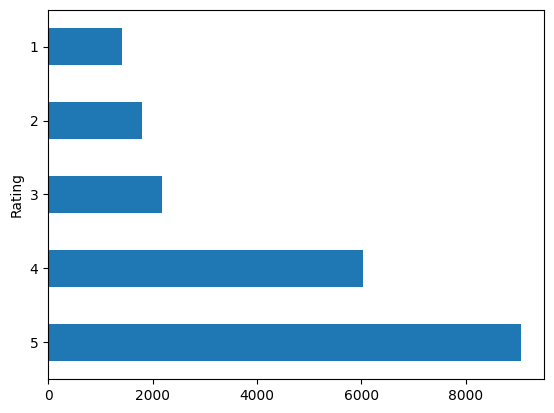

In [ ]:
data.Rating.value_counts().sort_index(ascending=False).plot(kind='barh')

# Распределение длин комметариев

<Axes: ylabel='Frequency'>

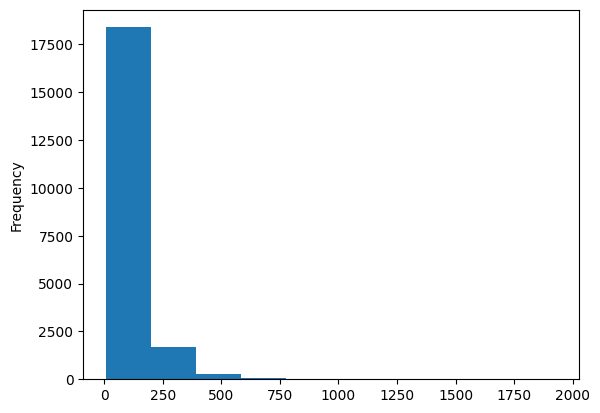

In [ ]:
data['ReviewLength'] = data.Review.str.split().apply(len)
data['ReviewLength'].plot.hist()

In [ ]:
print('Min review length = {}, max review legth = {}'.format(data['ReviewLength'].min(), data['ReviewLength'].max()))

Min review length = 7, max review legth = 1931


In [ ]:
data.loc[data['ReviewLength']==7, 'Review']

,Review
1501,"loved resort amazing space lot, not bored,"


In [ ]:
data.loc[data['ReviewLength']==1931, 'Review'].values[0]

"honest review visit 5/21-5/28 let begin saying heard secrets couple work went resort year returned raving experiences, all-inclusive regular cruise traveler past 4 years decided based word-of-mouth secrets place try.i read posts site daily, review written resort scoured eyes, reviews gotten good suspected staff secrets writing, fact person posted review claimed saw staff members reading posting forum, ca n't say stay excellence club saw type activity going wo n't past hotel ratings high posting positive reviews.in case read totally honest review secrets felt all-inclusive experience, end review include link photo page think enjoy.i booked trip judy maria travel internet, no travel agent travel site pop did search booking resort, went site saw photos judy maria resort chumming general manager, felt dealing travel agents knew resort took chance booking, great gamble, maria gave great price suggested perfect room location took travel worries hands, admit nervous n't room wanted helicopte

<Axes: title={'center': 'ReviewLength'}, xlabel='[Rating]'>

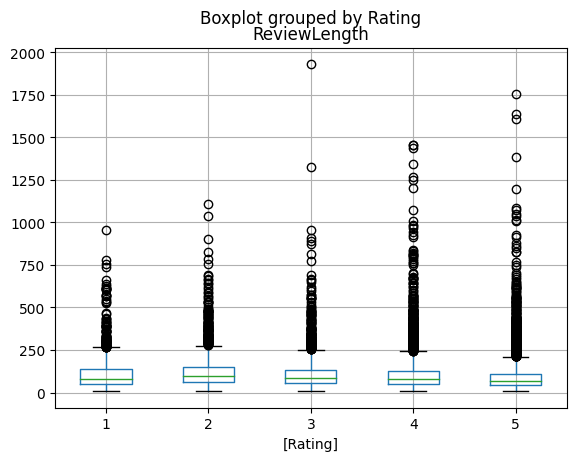

In [ ]:
data[['Rating','ReviewLength']].boxplot(by='Rating')

# Почистим данные от ссылок, тэгов, эмодзи

In [ ]:
def data_clean(text):
    text = str(text)
    text = text.lower()
    text = re.sub('  ', " ", text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r"https?:\S*", "", text)
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'#\S*', '', text)
    return text
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def remove_contraction(text):
    return contractions.fix(text)


In [ ]:
data['clean'] = data.Review.apply(data_clean).apply(strip_html_tags).apply(remove_emoji).apply(remove_contraction)

In [ ]:
data.head()

,Review,Rating,ReviewLength,clean
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,250,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,217,nice rooms not experience hotel monaco seattl...
3,"unique, great stay, wonderful time hotel monac...",5,89,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,191,great stay great stay went seahawk game awesom...


# Удалим стоп слова

In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ["n't", "nt"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    text = nltk.tokenize.word_tokenize(text)
    filtered_sentence = []

    for w in text:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
remove_stopwords("I'm in love")

['I', "'m", 'love']

In [ ]:
data['Cleaned'] = data['clean'].apply(remove_stopwords)

In [ ]:
data.head()

,Review,Rating,ReviewLength,clean,Cleaned
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,250,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,217,nice rooms not experience hotel monaco seattl...,"[nice, rooms, experience, hotel, monaco, seatt..."
3,"unique, great stay, wonderful time hotel monac...",5,89,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,191,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


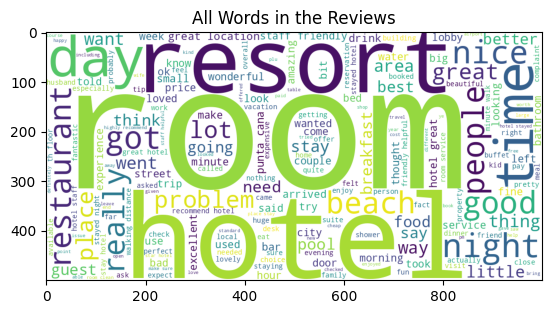

In [ ]:
all_words = ' '.join([' '.join(words) for words in data['Cleaned']])

# Создание облака слов
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.title('All Words in the Reviews')
plt.show()

# Нормализуем слова

In [ ]:
from nltk.stem import WordNetLemmatizer


def lemmatize(text):
    lemmatizer = WordNetLemmatizer()

    fil_tokens_lemma = [lemmatizer.lemmatize(token) for token in text]

    return fil_tokens_lemma

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('has')

[nltk_data] Downloading package wordnet to /root/nltk_data...


'ha'

In [ ]:
data['lemantized'] = data['Cleaned'].apply(lemmatize)

In [ ]:
data.head()

,Review,Rating,ReviewLength,clean,Cleaned,lemantized
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,250,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,217,nice rooms not experience hotel monaco seattl...,"[nice, rooms, experience, hotel, monaco, seatt...","[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5,89,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,191,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


# Добавим биграммы

In [ ]:
from gensim.models import *
from gensim.models.phrases import Phraser
from gensim import corpora

# Предполагается, что data['lemantized'] и data['Cleaned'] - список списков токенов.

# Создание фраз для биграмм
print('Creating bigrams...')
bigram = Phrases(data['lemantized'], min_count=5, threshold=100)  # Параметры можно настроить
bigram_mod = Phraser(bigram)

# Применение модели биграмм к корпусу текстов
data_bigrammed = [bigram_mod[doc] for doc in data['lemantized']]

# Создание словаря, включающего униграммы и биграммы
print('Making dictionary...')
dictionary = corpora.Dictionary(data_bigrammed)
print('Original: {}'.format(dictionary))

# Фильтрация словаря
dictionary.filter_extremes(no_below=5, no_above=0.9, keep_n=None)
dictionary.save('trip_advisor.dict')
print('Filtered: {}'.format(dictionary))

# Векторизация корпуса с униграммами и биграммами
print('Vectorizing corpus...')
corpus = [dictionary.doc2bow(bigram_mod[doc]) for doc in data['lemantized']]
corpora.MmCorpus.serialize('trip_advisor.model', corpus)

print('Unigrams and bigrams added and corpus vectorized successfully.')

Creating bigrams...
Making dictionary...
Original: Dictionary<72727 unique tokens: ['advantage', 'advice', 'anniversary', 'arrived', 'aveda_bath']...>
Filtered: Dictionary<14325 unique tokens: ['advantage', 'advice', 'anniversary', 'arrived', 'aveda_bath']...>
Vectorizing corpus...
Unigrams and bigrams added and corpus vectorized successfully.


In [ ]:
for i in range(30):
    print('Token id:', i, ' -> Token:', dictionary[i])

Token id: 0  -> Token: advantage
Token id: 1  -> Token: advice
Token id: 2  -> Token: anniversary
Token id: 3  -> Token: arrived
Token id: 4  -> Token: aveda_bath
Token id: 5  -> Token: bang
Token id: 6  -> Token: bed
Token id: 7  -> Token: check
Token id: 8  -> Token: clean
Token id: 9  -> Token: comfortable
Token id: 10  -> Token: deal
Token id: 11  -> Token: disappointed
Token id: 12  -> Token: door
Token id: 13  -> Token: easy
Token id: 14  -> Token: evening
Token id: 15  -> Token: expensive
Token id: 16  -> Token: experience
Token id: 17  -> Token: goldfish
Token id: 18  -> Token: good
Token id: 19  -> Token: got
Token id: 20  -> Token: great
Token id: 21  -> Token: hallway
Token id: 22  -> Token: hear
Token id: 23  -> Token: heard
Token id: 24  -> Token: high
Token id: 25  -> Token: hotel
Token id: 26  -> Token: late
Token id: 27  -> Token: like
Token id: 28  -> Token: little
Token id: 29  -> Token: location


In [ ]:
len(data['lemantized']), len(corpus)

(20491, 20491)

# LSI

In [ ]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=5, chunksize=50)

In [ ]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('hotel', 0.4659113334160601),
   ('room', 0.46164297675453897),
   ('great', 0.1806322418895861),
   ('good', 0.17024701726920838),
   ('day', 0.154561324945663),
   ('time', 0.14260504557091314),
   ('night', 0.1399081237719836),
   ('beach', 0.13809618082358924),
   ('staff', 0.13434597889806807),
   ('stay', 0.12160730367708264)]),
 (1,
  [('hotel', -0.6272139755960414),
   ('resort', 0.3358069823459166),
   ('beach', 0.3002604808007746),
   ('pool', 0.1777169170908686),
   ('food', 0.172388570399203),
   ('day', 0.1539030553729775),
   ('time', 0.13356135850506196),
   ('people', 0.12889304195508036),
   ('room', -0.10680970394295176),
   ('location', -0.10562332377115853)]),
 (2,
  [('room', -0.7840376051731567),
   ('hotel', 0.44684009393413787),
   ('great', 0.1591043488750641),
   ('beach', 0.15899380420914305),
   ('restaurant', 0.09214187301339455),
   ('food', 0.088037036922801),
   ('bed', -0.08160315065401161),
   ('pool', 0.08153853450888557),
   ('good', 0.07683

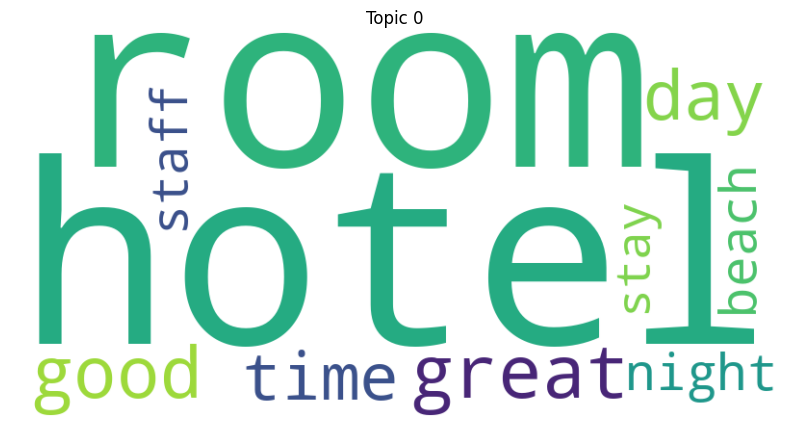

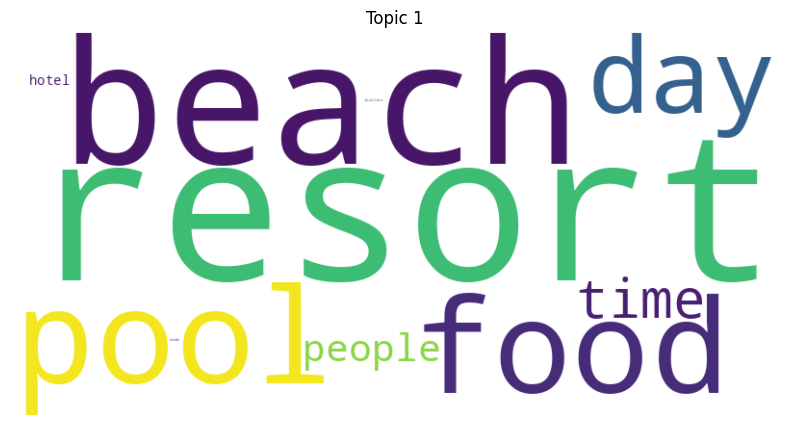

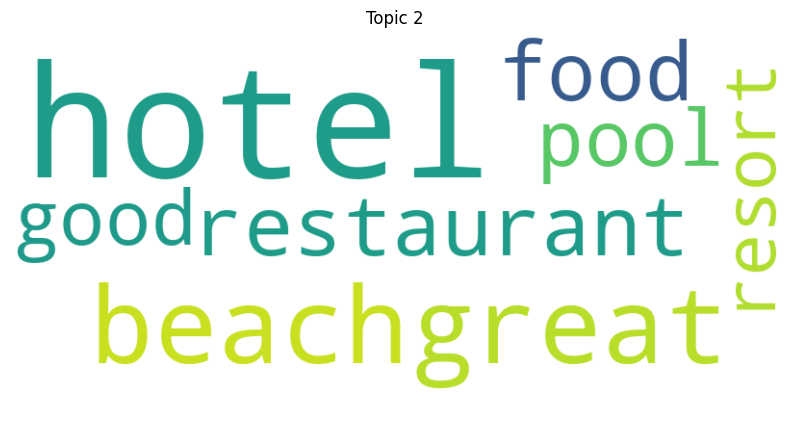

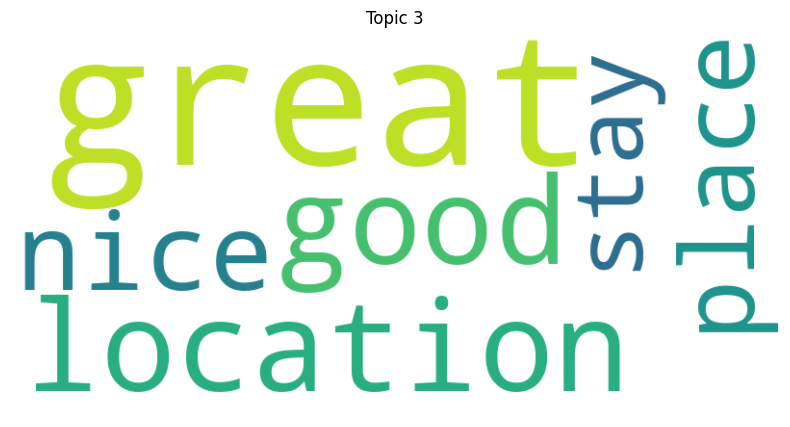

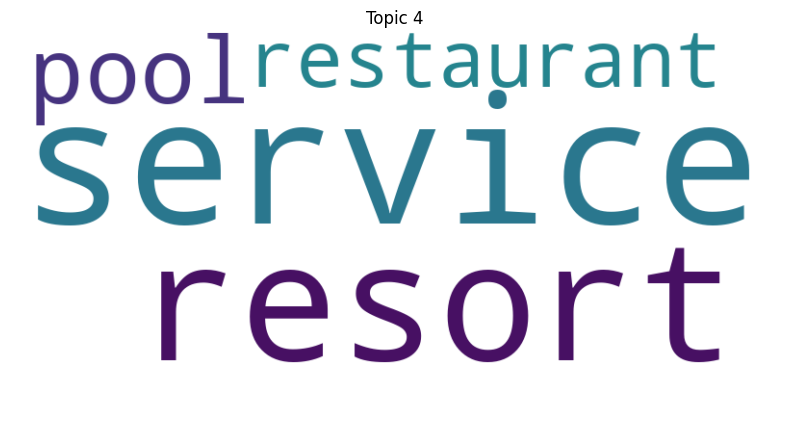

In [ ]:
topics = lsi.show_topics(num_topics=5, formatted=False)

# Функция для создания облака слов
def draw_wordcloud(topic_num, topics):
    topic = topics[topic_num]
    topic_words = dict(topic[1])
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()

# Визуализация облаков слов для каждого топика
for i in range(5):
    draw_wordcloud(i, topics)

# LDA

In [ ]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

Training model...
CPU times: user 25.7 s, sys: 173 ms, total: 25.9 s
Wall time: 26.1 s


In [ ]:
lda.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('service', 0.022488791),
   ('staff', 0.014021205),
   ('different', 0.010326676),
   ('trip', 0.009071003),
   ('make', 0.008745307),
   ('year', 0.008559194),
   ('breeze', 0.008439404),
   ('guest', 0.008373195),
   ('experience', 0.007611529),
   ('restaurant', 0.0073851724)]),
 (1,
  [('room', 0.06518931),
   ('bed', 0.021501811),
   ('bathroom', 0.015394541),
   ('floor', 0.014098758),
   ('breakfast', 0.013147345),
   ('small', 0.011903178),
   ('shower', 0.011222244),
   ('nice', 0.010384976),
   ('good', 0.0098914495),
   ('night', 0.009824946)]),
 (2,
  [('room', 0.03447834),
   ('hotel', 0.022800207),
   ('day', 0.015320602),
   ('time', 0.011814236),
   ('night', 0.010965187),
   ('got', 0.010768904),
   ('stay', 0.009305783),
   ('told', 0.008361269),
   ('said', 0.008109709),
   ('hour', 0.008067683)]),
 (3,
  [('hotel', 0.0824335),
   ('great', 0.028081415),
   ('room', 0.023648953),
   ('stay', 0.019575126),
   ('location', 0.018967533),
   ('staff', 0.01777798

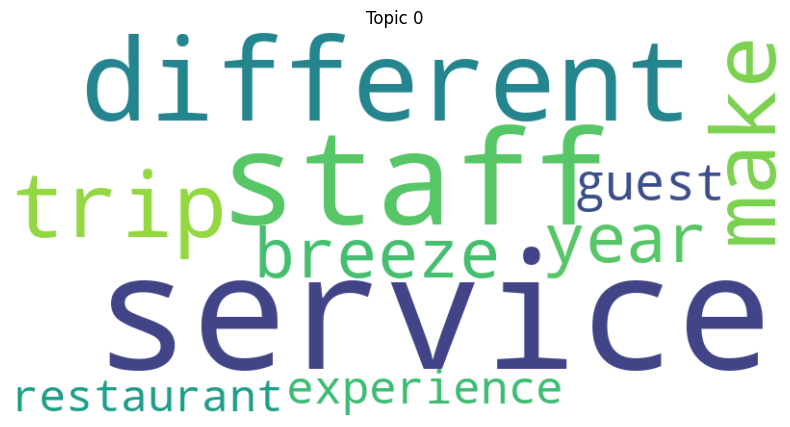

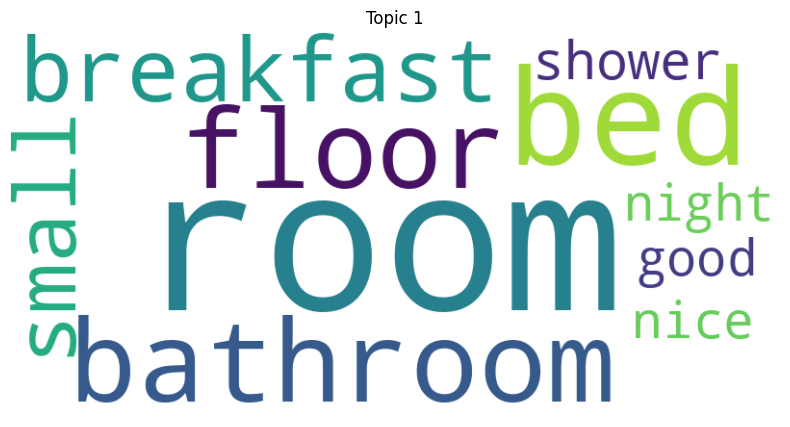

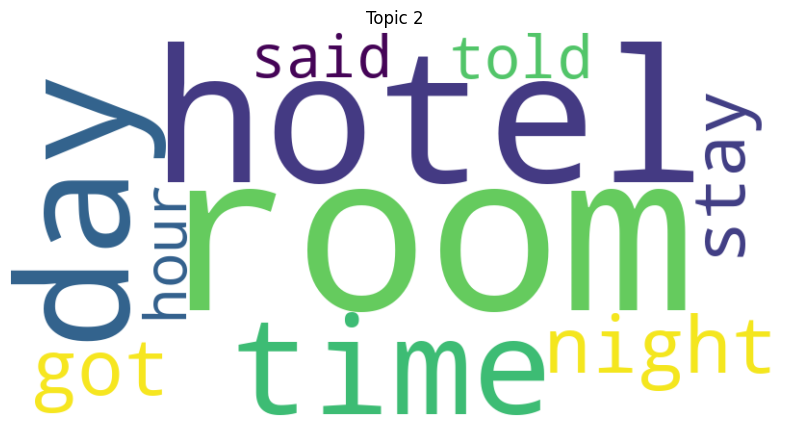

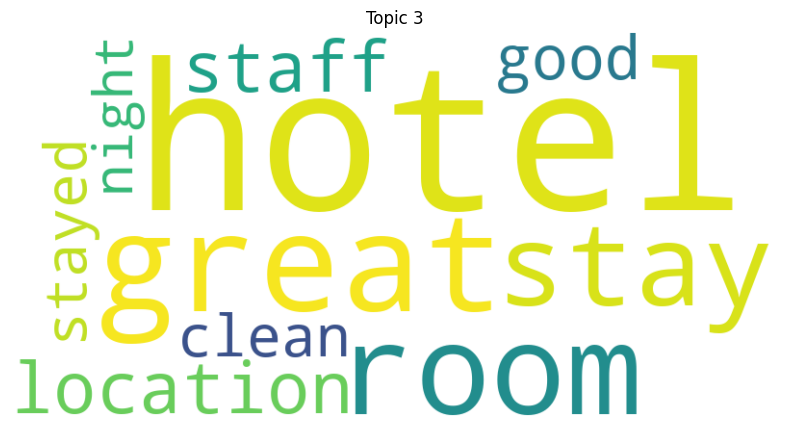

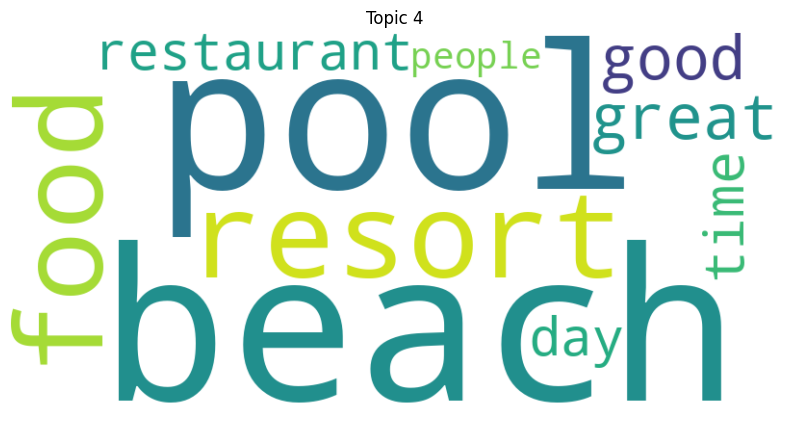

In [ ]:
topics = lda.show_topics(num_topics=5, formatted=False)

# Функция для создания облака слов
def draw_wordcloud(topic_num, topics):
    topic = topics[topic_num]
    topic_words = dict(topic[1])
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()

# Визуализация облаков слов для каждого топика
for i in range(5):
    draw_wordcloud(i, topics)

# BERTopic

In [ ]:
!pip install bertopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.clean)

2024-08-08 18:31:19,619 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/641 [00:00<?, ?it/s]

2024-08-08 18:40:32,780 - BERTopic - Embedding - Completed ✓
2024-08-08 18:40:32,782 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-08 18:41:28,801 - BERTopic - Dimensionality - Completed ✓
2024-08-08 18:41:28,803 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-08-08 18:41:34,851 - BERTopic - Cluster - Completed ✓
2024-08-08 18:41:34,876 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-08 18:41:38,941 - BERTopic - Representation - Completed ✓


CPU times: user 10min 22s, sys: 28.7 s, total: 10min 51s
Wall time: 11min 1s


In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 175


,Topic,Count,Name,Representation,Representative_Docs
0,-1,11182,-1_not_room_nt_hotel,"[not, room, nt, hotel, did, good, great, no, b...",[wonderful getaway husband couple year old da...
1,0,1560,0_location_great_staff_excellent,"[location, great, staff, excellent, helpful, c...",[great hotel loved hotel location perfect staf...
2,1,626,1_florence_duomo_italy_train,"[florence, duomo, italy, train, hotel, ponte, ...",[just got home trip italy booking rooms venice...
3,2,549,2_paris_metro_eiffel_hotel,"[paris, metro, eiffel, hotel, french, location...",[perfect location service stayed hotel la perl...
4,3,490,3_amsterdam_tram_canal_station,"[amsterdam, tram, canal, station, dam, central...",[great amsterdam hotel clean nicely furnished ...


In [ ]:
model.visualize_barchart(top_n_topics=5)

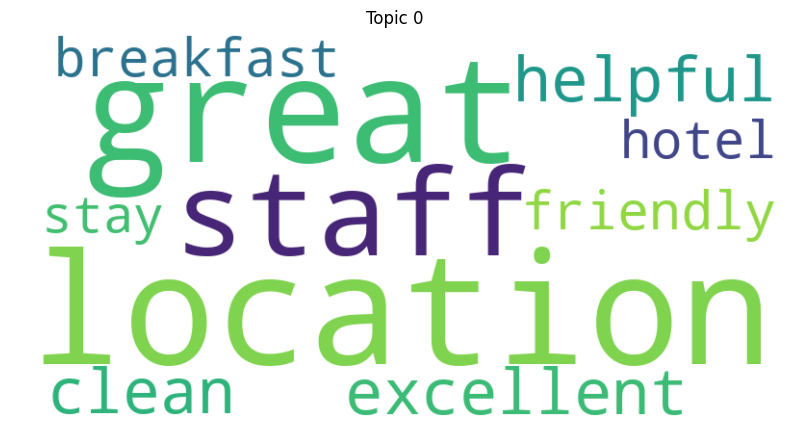

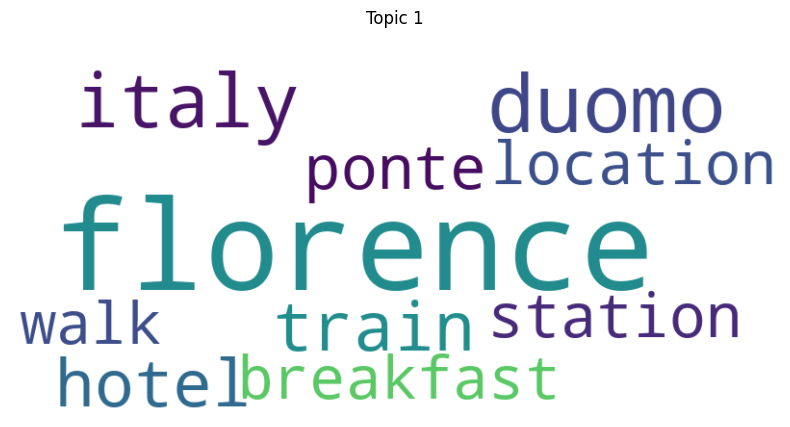

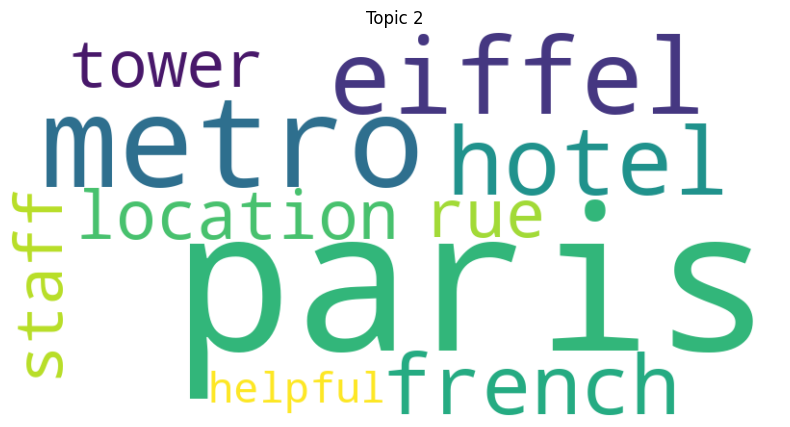

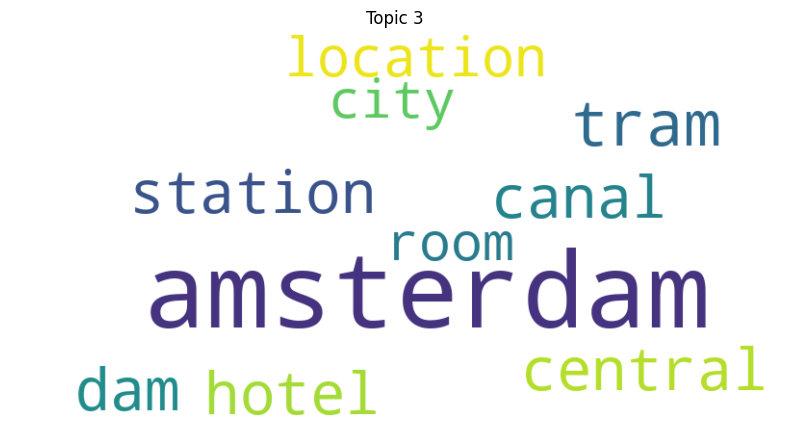

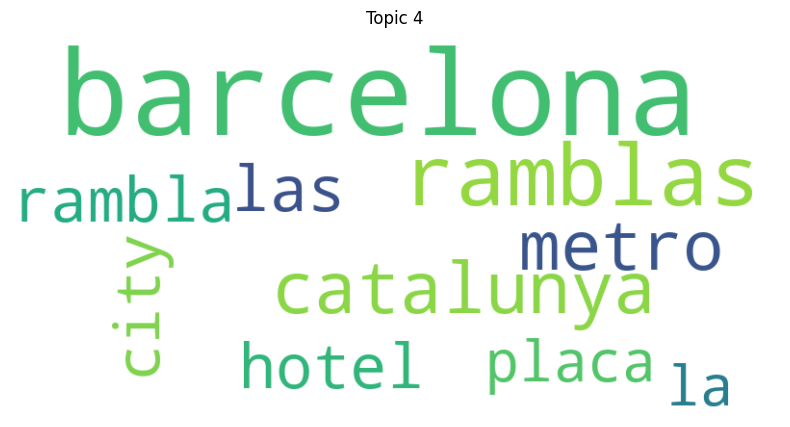

In [ ]:

def wordcloud_bert_topic(topic, topic_num):
    topic_words = dict(topic)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()
for topic_num in range(5):
  topic = model.get_topic(topic_num)
  wordcloud_bert_topic(topic, topic_num)

# Выводы:
* LDA вычисляется быстрее, чем LSA.
* BERTopic в топе выдал темы с конкретными городами мира.
